# Линейная регрессия

Последовательность работы:
1. Постановка задачи
2. Сбор, анализ, подготовка данных
3. Обучение модели
4. Оценка модели

## Для работы подключите датасет Housing Prices Competition

см. две картинки ниже

### 1) Во вкладке справа добавить input (если вкладка не открыта, то справа вверху экрана нажать стрелку)
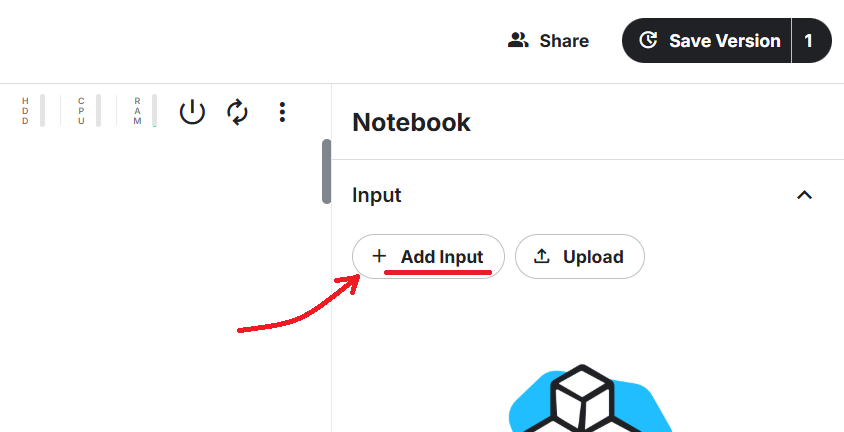

### 2) Ввести в поиск *Housing Prices*, нажать плюс
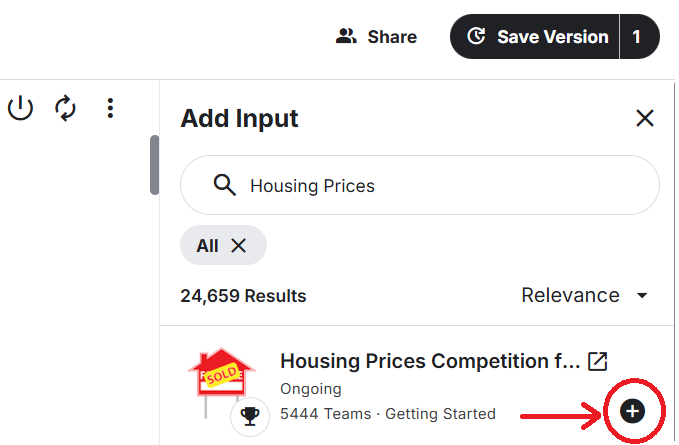

# Какие инструменты мы будем использовать

Библиотеки питона, которые мы сегодня используем

* pandas - стандартная библиотека для работы с табличными данными
* sklearn - библиотека с метриками, методами предобработки данных, моделями машинного обучения и многим другим
* matplotlib - самая популярная библиотека для рисования графиков на питоне
* numpy — библиотека для работы с многомерными массивами

In [ ]:
# импортируем библиотеки
import pandas as pd # библиотека для табличных данных
import numpy as np  # для числовых операций
import matplotlib.pyplot as plt # для графиков
import seaborn as sns

# Постановка задачи

## Предсказать цену на жильё на основе имеющихся данных

Регрессия в машинном обучении — это тип задачи, которая предсказывает числовые значения на основе данных.

https://www.kaggle.com/competitions/home-data-for-ml-course/overview

## Загрузка набора данных

In [ ]:
df = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv', sep=',')
df = df[['GrLivArea', 'GarageCars', 'GarageArea', 'OverallQual', 'TotalBsmtSF', 
         '1stFlrSF', 'ExterQual', 'BsmtQual', 'GarageYrBlt', 'MasVnrArea', 'LotFrontage', 'SalePrice']]
df

In [ ]:
df[df["SalePrice"]>600000] # фильтрация

In [ ]:
df[['SalePrice','BsmtQual']]

In [ ]:
df['BsmtQual'].unique() #уникальные значения столбца

In [ ]:
df[['SalePrice','ExterQual']][df['ExterQual'] == 'Fa'] # фильтрация

In [ ]:
df.drop(['SalePrice', 'ExterQual'], axis=1).head()

In [ ]:
df.iloc[:3, 3:5] #получение строк по числовым индексам

In [ ]:
df[['ExterQual', 'SalePrice']].sort_values('SalePrice', ascending=False) # сортировка

# Исследовательский анализ данных

In [ ]:
df.info() # просмотр типов переменных

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [ ]:
df.isnull().sum() # проверка на пропущенные значения

In [ ]:
miss = df.isnull().sum()
miss = miss[miss>0].sort_values(ascending=False)
miss

In [ ]:
df.describe() # статистические показатели

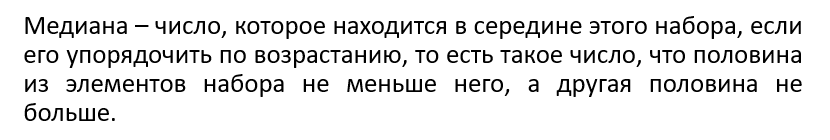

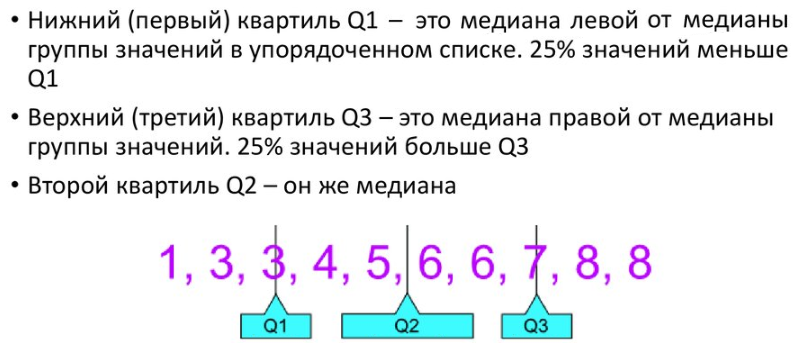

In [ ]:
plt.scatter(df['GrLivArea'], df['SalePrice'])

plt.xlabel('Above grade (ground) living area square feet')
plt.ylabel('The property\'s sale price in dollars')

In [ ]:
corr_matrix = df[numerical_cols.tolist()].corr()
corr_matrix

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# построим график
plt.scatter(df['OverallQual'], df['SalePrice'])

plt.xlabel('Overall material and finish quality')
plt.ylabel('The property\'s sale price in dollars')

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df['SalePrice']), kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.show()

In [ ]:
# ищем признаки с наиболее высокой корреляцией с целевой переменной

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_cols.tolist()].corr()
corr_matrix["SalePrice"].sort_values(ascending=False)[:10]

In [ ]:
# взаимная корреляция признаков
df['GarageCars'].corr(df['GarageArea'])

In [ ]:
# берем признаки с наиболее высокой корреляцией с целевой переменной

X = df[['GrLivArea', 'OverallQual','GarageCars']]
y = df['SalePrice']

In [ ]:
X.isnull().sum()

In [ ]:
# разобьем данные на обучающую и тестовую выборку
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) # размер тестовой выборки составит 20%

## Линейная регрессия

In [ ]:
# импортируем линейную регрессию
from sklearn.linear_model import LinearRegression

### Геометрический смысл

In [ ]:
X = df[['GrLivArea']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# построим график
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test, y_pred, color = 'red')

plt.xlabel('Above grade (ground) living area square feet')
plt.ylabel('The property\'s sale price in dollars')

Линейная регрессия:
* Хорошо работает, если зависимость между целевой переменной и признаками имеет линейный характер
* Хорошо интерпретируется
* Перед использованием лучше провести нормализацию данных, т.к масштаб влияет на веса

## Обучение базовой модели

In [ ]:
# создадим модель класса LinearRegression
model = LinearRegression()

# обучим нашу модель
model.fit(X_train, y_train)

Теперь сделаем предсказания с помощью метода **.predict(X)**. Заметьте, что в метод **.fit(X, y)** мы подавали матрицу с признаками и вектор с правильными ответами. В метод **.predict(X)** мы подаем только матрицу с признаками, потому что мы хотим сделать предсказание.

In [ ]:
y_pred = model.predict(X_test)

#print(y_pred)

Проверим результат. Воспользуемся метрикой RMSE

In [ ]:
from sklearn import metrics

# средняя абсолютная ошибка
print('MAE = ', metrics.mean_absolute_error(y_test, y_pred))

# корень среднеквадратической ошибки
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# коэффициент детерминации r-квадрат
# ~ доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью
# 1-(D[ошибки модели]/D[целевой переменной])
print('R2 = ', metrics.r2_score(y_test, y_pred))

# средняя абсолютная процентная ошибка
print('MAPE = ', metrics.mean_absolute_percentage_error(y_test, y_pred))

# Улучшения

In [ ]:
#добавим логарифм цены
df['logSalePrice'] = np.log1p(df['SalePrice'])

#обратная - np.expm1
df.head(2)

In [ ]:
X = df[['OverallQual', 'GrLivArea', 'GarageCars']]
y = df['logSalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
print('RMSE = ', np.sqrt(metrics.mean_squared_error(np.expm1(y_test), np.expm1(y_pred))))
print('R2 = ', metrics.r2_score(np.expm1(y_test), np.expm1(y_pred)))

## Нормализация

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

sns.histplot(df['GrLivArea'], ax=axes[0])
axes[0].set_title('Distribution of GrLivArea')

sns.histplot(df['OverallQual'], ax=axes[1])
axes[1].set_title('Distribution of OverallQual')

plt.tight_layout()
plt.show()

In [ ]:
sns.boxplot(x=df['GrLivArea'])

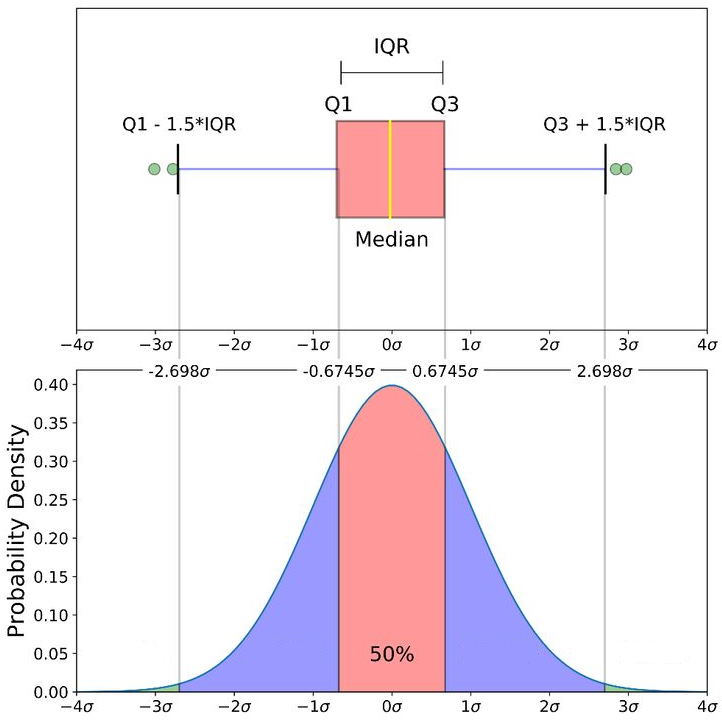

In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

X = df[['OverallQual', 'GrLivArea', 'GarageCars']]
y = df['logSalePrice']

In [ ]:
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(X)
minmax_df = pd.DataFrame(minmax_df, columns = ['OverallQual', 'GrLivArea', 'GarageCars'])

scaler = StandardScaler() #приводит к нулевому среднему и единичному стандартному отклонению
standard_df = scaler.fit_transform(X)
standard_df = pd.DataFrame(standard_df, columns = ['OverallQual', 'GrLivArea', 'GarageCars'])

scaler = RobustScaler() # использует медиану и межквартильный размах
robust_df = scaler.fit_transform(X)
robust_df = pd.DataFrame(robust_df, columns = ['OverallQual', 'GrLivArea', 'GarageCars'])

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(8, 10))

sns.histplot(minmax_df['GrLivArea'], ax=axes[0, 0])
axes[0, 0].set_title('MinMaxScaler on GrLivArea')

sns.histplot(minmax_df['OverallQual'], ax=axes[0, 1])
axes[0, 1].set_title('MinMaxScaler on OverallQual')

sns.histplot(standard_df['GrLivArea'], ax=axes[1, 0])
axes[1, 0].set_title('StandardScaler on GrLivArea')

sns.histplot(standard_df['OverallQual'], ax=axes[1, 1])
axes[1, 1].set_title('StandardScaler on OverallQual')

sns.histplot(robust_df['GrLivArea'], ax=axes[2, 0])
axes[2, 0].set_title('RobustScaler on GrLivArea')

sns.histplot(robust_df['OverallQual'], ax=axes[2, 1])
axes[2, 1].set_title('RobustScaler on OverallQual')

plt.tight_layout()
plt.show()

In [ ]:
X = robust_df[['OverallQual', 'GarageCars', 'GrLivArea']]

y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 = ', metrics.r2_score(y_test, y_pred))

## Выбросы

In [ ]:
#Неправильно (хоть результат и кажется приятным)

df_filtered = df[df["GrLivArea"]<4000]

X = df_filtered[['OverallQual', 'GrLivArea', 'GarageCars']]
y = df_filtered['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 = ', metrics.r2_score(y_test, y_pred))

In [ ]:
X = df[['OverallQual', 'GrLivArea', 'GarageCars']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

outliers = X_train[X_train["GrLivArea"]>4000].index

In [ ]:
X_train = X_train.drop(outliers)
y_train = y_train.drop(outliers)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 = ', metrics.r2_score(y_test, y_pred))

In [ ]:
corr_matrix["SalePrice"].sort_values(ascending=False).index

In [ ]:
X = df.drop(['SalePrice'], axis=1)

## Заполнение пропусков

In [ ]:
X.isnull().sum().sort_values(ascending=False)[:4]

In [ ]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [ ]:
sns.histplot(x=df['GarageYrBlt'])

In [ ]:
df['LotFrontage'].mean()

In [ ]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [ ]:
df['GarageYrBlt'].mode()[0]

In [ ]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])

## Обработка категориальных признаков

### LabelEncoder

In [ ]:
df.select_dtypes(include=['object']).columns

In [ ]:
plt.figure(figsize=(12, 4))
sns.histplot(df['BsmtQual'], shrink=0.7)

In [ ]:
from sklearn.preprocessing import LabelEncoder

lab_encoder = LabelEncoder()
df["BsmtQual"] = lab_encoder.fit_transform(df["BsmtQual"])
df.head()

### OnehotEncoder

In [ ]:
plt.figure(figsize=(12, 4))
sns.histplot(df['BsmtQual'], shrink=0.7)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder()
encode = onehot.fit_transform(df[['ExterQual']])

In [ ]:
df_encoded = pd.DataFrame(encode.toarray(), columns=onehot.categories_[0])
df_encoded.head()

# можно onehot.get_feature_names_out()

In [ ]:
df = df.join(df_encoded)  # join - функция для слияния таблиц по индексам
df.drop('ExterQual', axis = 1, inplace = True) # удаляем исходный признак

df.head()

In [ ]:
df = df.drop('Fa', axis = 1) # можно удалить OTHER (почему?)

## Сравнение

In [ ]:
X = df.drop(['SalePrice', 'logSalePrice'], axis=1)

In [ ]:
y = df['logSalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('RMSE = ', np.sqrt(metrics.mean_squared_error(np.expm1(y_test), np.expm1(y_pred))))
print('R2 = ', metrics.r2_score(y_test, y_pred))